# Discrete Fourier transform (DFT)

The discrete Fourier transform transforms a sequence of N complex numbers 

$${x_n} := x_0, x_1, ...., x_{N-1}$$ 

into another seq of complex numbers,

$${X_k} := X_0, X_1, X_2, ...., X_N$$

which is defined by

$$X_k = \sum_{n=0}^{N-1} x_n. e^{\frac{-i2\pi}{N}kn} = \sum_{n=0}^{N-1} x_n. [ cos(\frac{2\pi}{N}kn) - i.sin(\frac{2\pi}{N}kn)]$$

In [3]:
from numpy import sin,cos,pi
import numpy as np
import matplotlib.pyplot as plt
two_pi=2*pi


Let the  continuous signal be
$$f(t) = 5+2cos(2{\pi}t-{\pi}/{2})+3cos(4{\pi}t)$$

In [50]:
def f(t):
    tt=t+0.5
    return 5+2*cos(two_pi*tt-pi/2)+3*cos(2*two_pi*tt)

Text(0, 0.5, 'Amplitude')

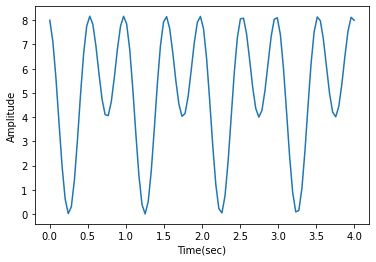

In [51]:
t=np.linspace(0,4,100)
f_t=f(t)
plt.plot(t,f_t)
plt.xlabel("Time(sec)")
plt.ylabel("Amplitude")

Let's sample the signal n times per second. i.e. fs=n Hz
i.e. f(1) => f(n) i.e. f(t) => f(k) where k=t/n 

In [47]:
def fk(k,fs):
    return f(k/fs)

In [48]:
def _round(a,order):
    a = [complex(round(i.real, order), round(i.imag, order)) for i in a]
    return a
def fft(a):
    # Recursive function of FFT
    n = len(a)
    # if input contains just one element
    if n == 1:
        return a
    # For storing n complex nth roots of unity
    theta = -2*pi/n
    w = list(complex(cos(theta*i), sin(theta*i)) for i in range(n))
    # Separate coefficients
    Aeven, Aodd = a[0::2], a[1::2]
    # Recursive call for even indexed coefficients
    Yeven = fft(Aeven)
    # Recursive call for odd indexed coefficients
    Yodd = fft(Aodd)
    # for storing values of y0, y1, y2, ..., yn-1.
    Y = [0]*n
    middle = n//2
    for k in range(n//2):
        w_yodd_k = w[k] * Yodd[k]
        yeven_k = Yeven[k]
        Y[k] = yeven_k + w_yodd_k
        Y[k + middle] = yeven_k - w_yodd_k
    return Y

[(160+0j), (-0+32j), (48-0j), 0j, -0j, (-0+0j), 0j, (-0+0j), 0j, (-0+0j), -0j, -0j, 0j, 0j, (-0+0j), (-0+0j), 0j, (-0-0j), (-0-0j), -0j, -0j, 0j, 0j, (-0-0j), 0j, (-0-0j), -0j, (-0-0j), 0j, -0j, (48+0j), -32j]


Text(0, 0.5, 'Amplitude')

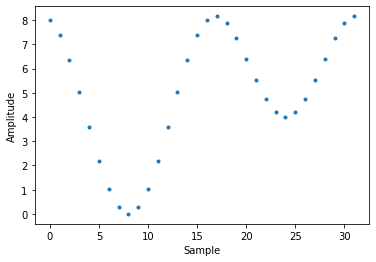

In [52]:
fs=32 #
k=np.linspace(0,fs-1,fs)
f_k=fk(k,fs)
print(_round(fft(f_k),5))
plt.plot(k,f_k,".")
plt.xlabel("Sample")
plt.ylabel("Amplitude")